## Notebook to calculate growth statistics and make graphs

In [138]:
import pandas as pd
from pandas import DataFrame, read_csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.graph_objects as go
import math

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [139]:
#Read in files
# Group A
groupA=pd.read_csv("../data/outputFiles/CompleteSet_GroupA.csv")
groupA=groupA.drop("Unnamed: 0",axis=1)
#Strip all leading whitespace in Area column
groupA['Area'] = groupA['Area'].apply(lambda x: x.strip())


# Group E
groupE=pd.read_csv("../data/outputFiles/CompleteSet_GroupE.csv")
groupE=groupE.drop("Unnamed: 0",axis=1)
#Strip all leading whitespace in Area column
groupE['Area'] = groupE['Area'].apply(lambda x: x.strip())

#Group E 2001
groupE_2001=pd.read_csv("../data/outputFiles/CompleteSet_2001_GroupE.csv")
groupE_2001=groupE_2001.drop("Unnamed: 0",axis=1)
#Strip all leading whitespace in Area column
groupE_2001['Area'] = groupE_2001['Area'].apply(lambda x: x.strip())


In [140]:
national=groupA.loc[groupA['ParentArea']=="TOTAL"]
print(national.shape)
national=national.drop_duplicates()
#delete the last row which contains details about the download
national=national.drop(1235,axis=0)
print(national.shape)

(357, 19)
(21, 19)


In [141]:
national_pop=groupE.loc[groupE['ParentArea']=="TOTAL"]
national_pop=national_pop.drop_duplicates()
#delete the last row which contains details about the download
#national=national.drop(1235,axis=0)
print(national_pop.shape)
national_pop

(3, 14)


,Area,European,Maori,Pacific,Asian,MidELatinAfr,Other,NZ,OtherNEC,TotPeopleStated,NotElseIncl,TotPeople,ParentArea,Year
0,Total - New Zealand by Regional Council/SA2,2609589.0,565329.0,265974.0,354552.0,34746.0,430881.0,429426.0,1491.0,3860163.0,167784.0,4027947.0,TOTAL,2006
22,Total - New Zealand by Regional Council/SA2,2969391.0,598602.0,295941.0,471708.0,46953.0,67752.0,65973.0,1788.0,4011399.0,230649.0,4242048.0,TOTAL,2013
44,Total - New Zealand by Regional Council/SA2,3297864.0,775836.0,381642.0,707598.0,70332.0,58053.0,45330.0,12756.0,4699755.0,0.0,4699755.0,TOTAL,2018


In [142]:
national_pop_2001=groupE_2001.loc[groupE_2001['ParentArea']=="TOTAL"]
national_pop_2001=national_pop_2001.drop_duplicates()
national_pop_2001

,Area,TotUsuallyResident,European,Maori,Pacific,Asia,Other,TotalSpec1orMore,ParentArea,Year
0,TotalNZ,3737280,2871432.0,526281.0,231801.0,238179.0,24993.0,3586734.0,TOTAL,2001


In [143]:
# Next, create the dataframe

plotDat=pd.DataFrame(columns=['Year','ALL_unit','LOG_unit','RET_unit','WSL_unit','TWD_unit',
                              'ALL_growth','LOG_growth','RET_growth','WSL_growth','TWD_growth'])
years=['2000','2001','2002','2003','2004','2005','2006','2007','2008',
      '2009','2010','2011','2012','2013','2014','2015','2016','2017','2018',
      '2019','2020']

for yr in range(len(years)):
    y=years[yr]
    ALL=national.loc[national['Year']==int(years[yr])].TotInd_GeogUnits.tolist()
    WSL=national.loc[national['Year']==int(years[yr])].F_GeogUnits.tolist()
    RET=national.loc[national['Year']==int(years[yr])].G_GeogUnits.tolist()
    s=national.loc[national['Year']==int(years[yr])].I461_GeogUnits.tolist()
    t=national.loc[national['Year']==int(years[yr])].I471_GeogUnits.tolist()
    w=national.loc[national['Year']==int(years[yr])].I481_GeogUnits.tolist()
    v=national.loc[national['Year']==int(years[yr])].I51_GeogUnits.tolist()
    x=national.loc[national['Year']==int(years[yr])].I53_GeogUnits.tolist()
    TWD=s[0]+t[0]+w[0]+v[0]+x[0]
    LOG=RET[0]+WSL[0]+TWD
    add_row={'Year':y,'ALL_unit':ALL[0],'LOG_unit':LOG,'RET_unit':RET[0],'WSL_unit':WSL[0],'TWD_unit':TWD,
            'ALL_growth':np.nan,'LOG_growth':np.nan,'RET_growth':np.nan,'WSL_growth':np.nan,'TWD_growth':np.nan}
    plotDat=plotDat.append(add_row,ignore_index=True)

plotDat['ALL_growth']=plotDat['ALL_unit']/plotDat.iloc[0,1]*100
plotDat['LOG_growth']=plotDat['LOG_unit']/plotDat.iloc[0,2]*100
plotDat['RET_growth']=plotDat['RET_unit']/plotDat.iloc[0,3]*100
plotDat['WSL_growth']=plotDat['WSL_unit']/plotDat.iloc[0,4]*100
plotDat['TWD_growth']=plotDat['TWD_unit']/plotDat.iloc[0,5]*100

In [144]:
plotDat['POP_num']=np.nan
plotDat['POP_growth']=np.nan

In [145]:
plotDat.iloc[1,11]=national_pop_2001.iloc[0,1]
plotDat.iloc[1,12]=plotDat.iloc[1,11]/plotDat.iloc[1,11]*100

plotDat.iloc[6,11]=national_pop.iloc[0,11]
plotDat.iloc[6,12]=plotDat.iloc[6,11]/plotDat.iloc[1,11]*100

plotDat.iloc[13,11]=national_pop.iloc[1,11]
plotDat.iloc[13,12]=plotDat.iloc[13,11]/plotDat.iloc[1,11]*100

plotDat.iloc[18,11]=national_pop.iloc[2,11]
plotDat.iloc[18,12]=plotDat.iloc[18,11]/plotDat.iloc[1,11]*100

plotDat=plotDat.interpolate(method='linear')
plotDat.iloc[0,12]=100
plotDat


,Year,ALL_unit,LOG_unit,RET_unit,WSL_unit,TWD_unit,ALL_growth,LOG_growth,RET_growth,WSL_growth,TWD_growth,POP_num,POP_growth
0,2000,406149.0,60252.0,30204.0,20253.0,9795.0,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,100.000000
1,2001,403344.0,58281.0,29289.0,19704.0,9288.0,99.309367,96.728739,96.970600,97.289290,94.823890,3.737280e+06,100.000000
2,2002,407661.0,57777.0,29106.0,19590.0,9081.0,100.372277,95.892253,96.364720,96.726411,92.710567,3.795413e+06,101.555500
3,2003,421701.0,58740.0,29682.0,19914.0,9144.0,103.829137,97.490540,98.271752,98.326174,93.353752,3.853547e+06,103.111001
4,2004,456717.0,61965.0,31620.0,20628.0,9717.0,112.450603,102.843059,104.688121,101.851578,99.203675,3.911680e+06,104.666501
5,2005,476415.0,63777.0,32613.0,21150.0,10014.0,117.300547,105.850428,107.975765,104.428973,102.235835,3.969814e+06,106.222001
6,2006,493440.0,64878.0,33366.0,21447.0,10065.0,121.492359,107.677753,110.468812,105.895423,102.756508,4.027947e+06,107.777501
7,2007,504288.0,64902.0,33675.0,21318.0,9909.0,124.163300,107.717586,111.491855,105.258480,101.163859,4.058533e+06,108.595900
8,2008,514827.0,65262.0,34026.0,21315.0,9921.0,126.758160,108.315077,112.653953,105.243668,101.286371,4.089119e+06,109.414299
9,2009,518487.0,64617.0,33738.0,21114.0,9765.0,127.659307,107.244573,111.700437,104.251222,99.693721,4.119705e+06,110.232698


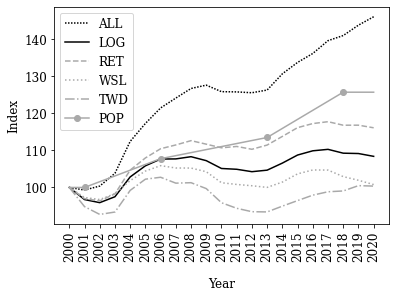

In [146]:
markers_on = [1, 6, 13, 18]
plt.plot(plotDat['Year'],plotDat['ALL_growth'],label="ALL",linestyle=(0,(1,1)),color='black')
plt.plot(plotDat['Year'],plotDat['LOG_growth'],label="LOG",linestyle="solid",color="black",linewidth=1.5)
plt.plot(plotDat['Year'],plotDat['RET_growth'],label="RET",linestyle="dashed",color="darkgrey",linewidth=1.5)
plt.plot(plotDat['Year'],plotDat['WSL_growth'],label="WSL",linestyle="dotted",color="darkgrey",linewidth=1.5)
plt.plot(plotDat['Year'],plotDat['TWD_growth'],label="TWD",linestyle="dashdot",color="darkgrey",linewidth=1.5)
plt.plot(plotDat['Year'],plotDat['POP_growth'],label="POP",linestyle="solid",markevery=markers_on,marker='o',color="darkgrey",linewidth=1.5)
#plt.title('Indexed growth (base year: 2000)')
plt.xticks(rotation=90,fontname='Serif',fontsize=12)
plt.xlabel('Year',fontname='Serif',fontsize=12,labelpad=16)
plt.ylabel('Index',fontname='Serif',fontsize=12)
plt.yticks(fontname='Serif',fontsize=12)
plt.legend(prop={'family':'Serif', 'size':12})
plt.show()
#plt.savefig('../manuscripts/graphics/IndexedGrowth.png')

In [158]:
plotDat2=pd.DataFrame(columns=["Year","Area","ALL_unit",'LOG_unit', 'RET_unit', 'WSL_unit', 'TWD_unit',
                              "ALL_perc",'LOG_perc', 'RET_perc', 'WSL_perc', 'TWD_perc'])
plotDat3=pd.DataFrame(columns=['Year','Area','POP_num','POP_perc'])

regionMaster=['Auckland Region','Bay of Plenty Region','Canterbury Region','Otago Region',
              'Waikato Region','Wellington Region']

regionMaster2=['AucklandRegion','BayOfPlentyRegion','CanterburyRegion',
               'OtagoRegion','WaikatoRegion','WellingtonRegion']

regionCombo=['Southland Region','Area Outside Region','Gisborne Region','Hawke\'s Bay Region','Marlborough Region','Nelson Region','Northland Region','Taranaki Region','Tasman Region','West Coast Region','Manawatu-Wanganui Region']
regionCombo2=['SouthlandRegion','AreaOutsideRegion','GisborneRegion','HawkesBayRegion','MarlboroughRegion','NelsonRegion','NorthlandRegion','TaranakiRegion','TasmanRegion','WestCoastRegion','Manawatu-WanganuiRegion']

years1=[2000,2020]
years2=[2001,2018]

count=0

for region in regionMaster:
    for yr in years1:
        sliced=groupA.loc[(groupA["Year"]==yr) & (groupA['Area']==region)]
        if(region=='Manawatu-Wanganui Region'):
            s=sliced.iloc[0,7]+sliced.iloc[0,9]+sliced.iloc[0,13]+sliced.iloc[0,15]
        else:
            s=sliced.iloc[0,7]+sliced.iloc[0,9]+sliced.iloc[0,11]+sliced.iloc[0,13]+sliced.iloc[0,15]
        log=s+sliced.iloc[0,5]+sliced.iloc[0,3]
        add_row={"Year":yr,"Area":region,"ALL_unit":sliced.iloc[0,1],'LOG_unit':log, 'RET_unit':sliced.iloc[0,5], 
                 'WSL_unit':sliced.iloc[0,3], 'TWD_unit':s,
                 "ALL_perc":np.nan,'LOG_perc':np.nan, 'RET_perc':np.nan, 'WSL_perc':np.nan, 'TWD_perc':np.nan}
        plotDat2=plotDat2.append(add_row,ignore_index=True)
        
for yr in years1:
    sliced=groupA.loc[(groupA["Year"]==yr) & (groupA['Area'].isin(regionCombo))]
    ALL=sliced['TotInd_GeogUnits'].sum(skipna=True)
    WSL=sliced['F_GeogUnits'].sum(skipna=True)
    RET=sliced['G_GeogUnits'].sum(skipna=True)
    TWD=sliced['I461_GeogUnits'].sum(skipna=True)+sliced['I471_GeogUnits'].sum(skipna=True)+sliced['I481_GeogUnits'].sum(skipna=True)+sliced['I51_GeogUnits'].sum(skipna=True)+sliced['I53_GeogUnits'].sum(skipna=True)
    LOG=TWD+RET+WSL
    add_row={"Year":yr,"Area":'Rest of NZ',"ALL_unit":ALL,'LOG_unit':LOG, 'RET_unit':RET, 
                 'WSL_unit':WSL, 'TWD_unit':TWD,
                 "ALL_perc":np.nan,'LOG_perc':np.nan, 'RET_perc':np.nan, 'WSL_perc':np.nan, 'TWD_perc':np.nan}
    plotDat2=plotDat2.append(add_row,ignore_index=True)

        
for region in regionMaster2:
    sliced=groupE_2001.loc[groupE_2001['Area']==region]
    add_row={'Year':2001,'Area':region,'POP_num':sliced.iloc[0,1],'POP_perc':np.nan}
    plotDat3=plotDat3.append(add_row,ignore_index=True)

for region in regionMaster:
    sliced=groupE.loc[(groupE["Year"]==2018) & (groupE['Area']==region)]
    add_row={'Year':2018,'Area':region,'POP_num':sliced.iloc[0,11],'POP_perc':np.nan}
    plotDat3=plotDat3.append(add_row,ignore_index=True)
    
sliced=groupE_2001.loc[groupE_2001['Area'].isin(regionCombo2)]
add_row={'Year':2001,'Area':'Rest of NZ','POP_num':sliced['TotUsuallyResident'].sum(skipna=True),'POP_perc':np.nan}
plotDat3=plotDat3.append(add_row,ignore_index=True)

sliced=groupE.loc[(groupE["Year"]==2018) & (groupE['Area'].isin(regionCombo))]
add_row={'Year':2018,'Area':'Rest of NZ','POP_num':sliced['TotPeople'].sum(skipna=True),'POP_perc':np.nan}
plotDat3=plotDat3.append(add_row,ignore_index=True)
    

In [42]:
plotDat2_2000=plotDat2.loc[plotDat2['Year']==2000]
plotDat2_2000['ALL_perc']=plotDat2_2000['ALL_unit']/plotDat2_2000['ALL_unit'].sum()
plotDat2_2000['LOG_perc']=plotDat2_2000['LOG_unit']/plotDat2_2000['LOG_unit'].sum()
plotDat2_2000['RET_perc']=plotDat2_2000['RET_unit']/plotDat2_2000['RET_unit'].sum()
plotDat2_2000['WSL_perc']=plotDat2_2000['WSL_unit']/plotDat2_2000['WSL_unit'].sum()
plotDat2_2000['TWD_perc']=plotDat2_2000['TWD_unit']/plotDat2_2000['TWD_unit'].sum()


plotDat2_2020=plotDat2.loc[plotDat2['Year']==2020]
plotDat2_2020['ALL_perc']=plotDat2_2020['ALL_unit']/plotDat2_2020['ALL_unit'].sum()
plotDat2_2020['LOG_perc']=plotDat2_2020['LOG_unit']/plotDat2_2020['LOG_unit'].sum()
plotDat2_2020['RET_perc']=plotDat2_2020['RET_unit']/plotDat2_2020['RET_unit'].sum()
plotDat2_2020['WSL_perc']=plotDat2_2020['WSL_unit']/plotDat2_2020['WSL_unit'].sum()
plotDat2_2020['TWD_perc']=plotDat2_2020['TWD_unit']/plotDat2_2020['TWD_unit'].sum()

plotDat3_2001=plotDat3.loc[plotDat3['Year']==2001]
plotDat3_2001['POP_perc']=plotDat3_2001['POP_num']/plotDat3_2001['POP_num'].sum()
plotDat3_2001['Area']=['Auckland Region','Bay of Plenty Region','Canterbury Region','Manawatu-Wanganui Region','Otago Region','Waikato Region','Wellington Region','Rest of NZ']

plotDat3_2018=plotDat3.loc[plotDat3['Year']==2018]
plotDat3_2018['POP_perc']=plotDat3_2018['POP_num']/plotDat3_2018['POP_num'].sum()


/var/folders/d9/t204x1311sq225p1m303pk4r0000gr/T/ipykernel_12641/456991375.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/d9/t204x1311sq225p1m303pk4r0000gr/T/ipykernel_12641/456991375.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/d9/t204x1311sq225p1m303pk4r0000gr/T/ipykernel_12641/456991375.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [173]:
ALL=['ALL']*14
LOG=['LOG']*14
RET=['RET']*14
WSL=['WSL']*14
TWD=['TWD']*14
POP=['POP']*14
years1=[2000,2020] *7*5
years2=[2001,2018]*7

df = pd.DataFrame(
    dict(
        year=years1+years2,
        area=['Auckland Region','Auckland Region','Canterbury Region','Canterbury Region',
              'Wellington Region','Wellington Region','Waikato Region','Waikato Region',
              'Bay of Plenty Region','Bay of Plenty Region','Otago Region','Otago Region',
              'Rest of NZ','Rest of NZ']*6,
        facType=ALL+LOG+RET+WSL+TWD+POP,
        perc=[np.nan]*84,
    )
)  


In [174]:
for i in range(len(df)):
    if(df.iloc[i,2]!='POP'):
        if(df.iloc[i,0]==2000):
            sliced=plotDat2_2000.loc[plotDat2_2000['Area']==df.iloc[i,1]]    
        else:
            sliced=plotDat2_2020.loc[plotDat2_2020['Area']==df.iloc[i,1]]    
        if(df.iloc[i,2]=="ALL"):
            df.iloc[i,3]=sliced.iloc[0,7]
        elif(df.iloc[i,2]=="LOG"):
            df.iloc[i,3]=sliced.iloc[0,8]
        elif(df.iloc[i,2]=="RET"):
            df.iloc[i,3]=sliced.iloc[0,9]
        elif(df.iloc[i,2]=="WSL"):
            df.iloc[i,3]=sliced.iloc[0,10]
        elif(df.iloc[i,2]=="TWD"):
            df.iloc[i,3]=sliced.iloc[0,11]
    else:
        if(df.iloc[i,0]==2001):
            sliced=plotDat3_2001.loc[plotDat3_2001['Area']==df.iloc[i,1]]    
        else:
            sliced=plotDat3_2018.loc[plotDat3_2018['Area']==df.iloc[i,1]]   
        df.iloc[i,3]=sliced.iloc[0,3]
        

In [153]:
fig = go.Figure()
fig.layout.font.family = 'Serif'

fig.update_layout(
    template="simple_white",
    #xaxis=dict(title_text="Facility Type"),
    yaxis=dict(title_text="Proportion of national"),
    barmode="stack",
)


colors = ["rgb(0,0,0)", 'rgb(37,37,37)','rgb(82,82,82)', 'rgb(115,115,115)','rgb(150,150,150)','rgb(189,189,189)', 'rgb(217,217,217)','rgb(240,240,240)']

for r, c in zip(df.area.unique(), colors):
    plot_df = df[df.area == r]
    fig.add_trace(
        go.Bar(x=[plot_df.facType, plot_df.year], y=plot_df.perc, name=r, marker_color=c,text = round(plot_df.perc,2), textposition = 'auto'),
    )

fig

### Calculating overall growth and CAGR for table

In [92]:
#17-year growth
begin=national.loc[national['Year']==2000]
end=national.loc[national['Year']==2020]

begin_ALL=begin.iloc[0,1]
end_ALL=end.iloc[0,1]
print("ALL 20 year growth:"+str(round((end_ALL/begin_ALL-1)*100,4)))

begin_RET=begin.iloc[0,5]
end_RET=end.iloc[0,5]
print("RET 20 year growth:"+str(round((end_RET/begin_RET-1)*100,4)))

begin_WSL=begin.iloc[0,3]
end_WSL=end.iloc[0,3]
print("WSL 20 year growth:"+str(round((end_WSL/begin_WSL-1)*100,4)))

begin_TWD=begin.iloc[0,7]+begin.iloc[0,9]+begin.iloc[0,11]+begin.iloc[0,13]+begin.iloc[0,15]
end_TWD=end.iloc[0,7]+end.iloc[0,9]+end.iloc[0,11]+end.iloc[0,13]+end.iloc[0,15]
print("TWD 20 year growth:"+str(round((end_TWD/begin_TWD-1)*100,4)))

begin_LOG=begin_RET+begin_WSL+begin_TWD
end_LOG=end_RET+end_WSL+end_TWD
print("LOG 20 year growth:"+str(round((end_LOG/begin_LOG-1)*100,4)))


begin=national_pop_2001.iloc[0,1]
end=national_pop.loc[national_pop['Year']==2018]
end=end.iloc[0,11]
print("POP 17 year growth:"+str(round((end/begin-1)*100,4)))



ALL 20 year growth:46.1513
RET 20 year growth:16.1303
WSL 20 year growth:0.7851
TWD 20 year growth:0.3675
LOG 20 year growth:8.4097
POP 17 year growth:25.7534


In [109]:
# CAGR (end/begin)^(1/period)-1

#### 2001-2006
print('CAGR 2001-2006')
begin=national.loc[national['Year']==2001]
end=national.loc[national['Year']==2006]

begin_ALL=begin.iloc[0,1]
end_ALL=end.iloc[0,1]
c=(math.pow(end_ALL/begin_ALL,(1/5))-1)*100
print("ALL:"+str(round(c,2)))

begin_RET=begin.iloc[0,5]
end_RET=end.iloc[0,5]
c=(math.pow(end_RET/begin_RET,(1/5))-1)*100
print("RET:"+str(round(c,2)))

begin_WSL=begin.iloc[0,3]
end_WSL=end.iloc[0,3]
c=(math.pow(end_WSL/begin_WSL,(1/5))-1)*100
print("WSL:"+str(round(c,2)))


begin_TWD=begin.iloc[0,7]+begin.iloc[0,9]+begin.iloc[0,11]+begin.iloc[0,13]+begin.iloc[0,15]
end_TWD=end.iloc[0,7]+end.iloc[0,9]+end.iloc[0,11]+end.iloc[0,13]+end.iloc[0,15]
c=(math.pow(end_TWD/begin_TWD,(1/5))-1)*100
print("TWD:"+str(round(c,2)))


begin_LOG=begin_RET+begin_WSL+begin_TWD
end_LOG=end_RET+end_WSL+end_TWD
c=(math.pow(end_LOG/begin_LOG,(1/5))-1)*100
print("LOG:"+str(round(c,2)))


begin=national_pop_2001.iloc[0,1]
end=national_pop.loc[national_pop['Year']==2006]
end=end.iloc[0,11]
c=(math.pow(end/begin,(1/5))-1)*100
print("POP:"+str(round(c,2)))


#### 2006-2013
print('CAGR 2006-2013')
begin=national.loc[national['Year']==2006]
end=national.loc[national['Year']==2013]

begin_ALL=begin.iloc[0,1]
end_ALL=end.iloc[0,1]
c=(math.pow(end_ALL/begin_ALL,(1/7))-1)*100
print("ALL:"+str(round(c,2)))

begin_RET=begin.iloc[0,5]
end_RET=end.iloc[0,5]
c=(math.pow(end_RET/begin_RET,(1/7))-1)*100
print("RET:"+str(round(c,2)))

begin_WSL=begin.iloc[0,3]
end_WSL=end.iloc[0,3]
c=(math.pow(end_WSL/begin_WSL,(1/7))-1)*100
print("WSL:"+str(round(c,2)))


begin_TWD=begin.iloc[0,7]+begin.iloc[0,9]+begin.iloc[0,11]+begin.iloc[0,13]+begin.iloc[0,15]
end_TWD=end.iloc[0,7]+end.iloc[0,9]+end.iloc[0,11]+end.iloc[0,13]+end.iloc[0,15]
c=(math.pow(end_TWD/begin_TWD,(1/7))-1)*100
print("TWD:"+str(round(c,2)))

begin_LOG=begin_RET+begin_WSL+begin_TWD
end_LOG=end_RET+end_WSL+end_TWD
c=(math.pow(end_LOG/begin_LOG,(1/7))-1)*100
print("LOG:"+str(round(c,2)))


begin=national_pop.loc[national_pop['Year']==2006]
end=national_pop.loc[national_pop['Year']==2013]
begin=begin.iloc[0,11]
end=end.iloc[0,11]
c=(math.pow(end/begin,(1/7))-1)*100
print("POP:"+str(round(c,2)))

#### 2013-2018
print('CAGR 2013-2018')
begin=national.loc[national['Year']==2013]
end=national.loc[national['Year']==2018]

begin_ALL=begin.iloc[0,1]
end_ALL=end.iloc[0,1]
c=(math.pow(end_ALL/begin_ALL,(1/5))-1)*100
print("ALL:"+str(round(c,2)))

begin_RET=begin.iloc[0,5]
end_RET=end.iloc[0,5]
c=(math.pow(end_RET/begin_RET,(1/5))-1)*100
print("RET:"+str(round(c,2)))

begin_WSL=begin.iloc[0,3]
end_WSL=end.iloc[0,3]
c=(math.pow(end_WSL/begin_WSL,(1/5))-1)*100
print("WSL:"+str(round(c,2)))


begin_TWD=begin.iloc[0,7]+begin.iloc[0,9]+begin.iloc[0,11]+begin.iloc[0,13]+begin.iloc[0,15]
end_TWD=end.iloc[0,7]+end.iloc[0,9]+end.iloc[0,11]+end.iloc[0,13]+end.iloc[0,15]
c=(math.pow(end_TWD/begin_TWD,(1/5))-1)*100
print("TWD:"+str(round(c,2)))

begin_LOG=begin_RET+begin_WSL+begin_TWD
end_LOG=end_RET+end_WSL+end_TWD
c=(math.pow(end_LOG/begin_LOG,(1/5))-1)*100
print("LOG:"+str(round(c,2)))


begin=national_pop.loc[national_pop['Year']==2013]
end=national_pop.loc[national_pop['Year']==2018]
begin=begin.iloc[0,11]
end=end.iloc[0,11]
c=(math.pow(end/begin,(1/5))-1)*100
print("POP:"+str(round(c,2)))

#### 2018-2013
print('CAGR 2018-2020')
begin=national.loc[national['Year']==2018]
end=national.loc[national['Year']==2020]

begin_ALL=begin.iloc[0,1]
end_ALL=end.iloc[0,1]
c=(math.pow(end_ALL/begin_ALL,(1/2))-1)*100
print("ALL:"+str(round(c,2)))

begin_RET=begin.iloc[0,5]
end_RET=end.iloc[0,5]
c=(math.pow(end_RET/begin_RET,(1/2))-1)*100
print("RET:"+str(round(c,2)))

begin_WSL=begin.iloc[0,3]
end_WSL=end.iloc[0,3]
c=(math.pow(end_WSL/begin_WSL,(1/2))-1)*100
print("WSL:"+str(round(c,2)))


begin_TWD=begin.iloc[0,7]+begin.iloc[0,9]+begin.iloc[0,11]+begin.iloc[0,13]+begin.iloc[0,15]
end_TWD=end.iloc[0,7]+end.iloc[0,9]+end.iloc[0,11]+end.iloc[0,13]+end.iloc[0,15]
c=(math.pow(end_TWD/begin_TWD,(1/2))-1)*100
print("TWD:"+str(round(c,2)))

begin_LOG=begin_RET+begin_WSL+begin_TWD
end_LOG=end_RET+end_WSL+end_TWD
c=(math.pow(end_LOG/begin_LOG,(1/2))-1)*100
print("LOG:"+str(round(c,2)))

CAGR 2001-2006
ALL:4.11
RET:2.64
WSL:1.71
TWD:1.62
LOG:2.17
POP:1.51
CAGR 2006-2013
ALL:0.56
RET:0.13
WSL:-0.81
TWD:-1.36
LOG:-0.4
POP:0.74
CAGR 2013-2018
ALL:2.23
RET:0.94
WSL:0.58
TWD:1.19
LOG:0.86
POP:2.07
CAGR 2018-2020
ALL:1.79
RET:-0.3
WSL:-1.05
TWD:0.66
LOG:-0.39


### Regional growth

In [125]:
print("Auckland Region")
begin=plotDat2.loc[(plotDat2['Area']=="Auckland Region")&(plotDat2['Year']==2000)]
end=plotDat2.loc[(plotDat2['Area']=="Auckland Region")&(plotDat2['Year']==2020)]

print("ALL: "+str(round((end.iloc[0,2]/begin.iloc[0,2]-1)*100,2)))
print("LOG: "+str(round((end.iloc[0,3]/begin.iloc[0,3]-1)*100,2)))
print("RET: "+str(round((end.iloc[0,4]/begin.iloc[0,4]-1)*100,2)))
print("WSL: "+str(round((end.iloc[0,5]/begin.iloc[0,5]-1)*100,2)))
print("TWD: "+str(round((end.iloc[0,6]/begin.iloc[0,6]-1)*100,2)))

begin=groupE_2001.loc[groupE_2001['Area']=="AucklandRegion"]
end=groupE.loc[(groupE['Area']=="Auckland Region")&(groupE['Year']==2018)]
print("POP: "+str(round((end.iloc[0,11]/begin.iloc[0,1]-1)*100,2)))

Auckland Region
ALL: 67.34
LOG: 20.01
RET: 40.24
WSL: 5.86
TWD: 0.45
POP: 35.62


In [126]:
print("Bay of Plenty Region")
region='Bay of Plenty Region'
region2='BayOfPlentyRegion'
begin=plotDat2.loc[(plotDat2['Area']==region)&(plotDat2['Year']==2000)]
end=plotDat2.loc[(plotDat2['Area']==region)&(plotDat2['Year']==2020)]

print("ALL: "+str(round((end.iloc[0,2]/begin.iloc[0,2]-1)*100,2)))
print("LOG: "+str(round((end.iloc[0,3]/begin.iloc[0,3]-1)*100,2)))
print("RET: "+str(round((end.iloc[0,4]/begin.iloc[0,4]-1)*100,2)))
print("WSL: "+str(round((end.iloc[0,5]/begin.iloc[0,5]-1)*100,2)))
print("TWD: "+str(round((end.iloc[0,6]/begin.iloc[0,6]-1)*100,2)))

begin=groupE_2001.loc[groupE_2001['Area']==region2]
end=groupE.loc[(groupE['Area']==region)&(groupE['Year']==2018)]
print("POP: "+str(round((end.iloc[0,11]/begin.iloc[0,1]-1)*100,2)))

Bay of Plenty Region
ALL: 46.39
LOG: 9.86
RET: 14.29
WSL: 5.17
TWD: 3.96
POP: 28.86


In [129]:
print("Otago Region")
region='Otago Region'
region2='OtagoRegion'
begin=plotDat2.loc[(plotDat2['Area']==region)&(plotDat2['Year']==2000)]
end=plotDat2.loc[(plotDat2['Area']==region)&(plotDat2['Year']==2020)]

print("ALL: "+str(round((end.iloc[0,2]/begin.iloc[0,2]-1)*100,2)))
print("LOG: "+str(round((end.iloc[0,3]/begin.iloc[0,3]-1)*100,2)))
print("RET: "+str(round((end.iloc[0,4]/begin.iloc[0,4]-1)*100,2)))
print("WSL: "+str(round((end.iloc[0,5]/begin.iloc[0,5]-1)*100,2)))
print("TWD: "+str(round((end.iloc[0,6]/begin.iloc[0,6]-1)*100,2)))

begin=groupE_2001.loc[groupE_2001['Area']==region2]
end=groupE.loc[(groupE['Area']==region)&(groupE['Year']==2018)]
print("POP: "+str(round((end.iloc[0,11]/begin.iloc[0,1]-1)*100,2)))

Otago Region
ALL: 64.75
LOG: 11.19
RET: 13.57
WSL: 8.97
TWD: 5.97
POP: 24.04


In [130]:
print("Waikato Region")
region='Waikato Region'
region2='WaikatoRegion'
begin=plotDat2.loc[(plotDat2['Area']==region)&(plotDat2['Year']==2000)]
end=plotDat2.loc[(plotDat2['Area']==region)&(plotDat2['Year']==2020)]

print("ALL: "+str(round((end.iloc[0,2]/begin.iloc[0,2]-1)*100,2)))
print("LOG: "+str(round((end.iloc[0,3]/begin.iloc[0,3]-1)*100,2)))
print("RET: "+str(round((end.iloc[0,4]/begin.iloc[0,4]-1)*100,2)))
print("WSL: "+str(round((end.iloc[0,5]/begin.iloc[0,5]-1)*100,2)))
print("TWD: "+str(round((end.iloc[0,6]/begin.iloc[0,6]-1)*100,2)))

begin=groupE_2001.loc[groupE_2001['Area']==region2]
end=groupE.loc[(groupE['Area']==region)&(groupE['Year']==2018)]
print("POP: "+str(round((end.iloc[0,11]/begin.iloc[0,1]-1)*100,2)))

Waikato Region
ALL: 35.09
LOG: 9.08
RET: 11.81
WSL: 6.36
TWD: 5.14
POP: 28.09


In [131]:
print("Wellington Region")
region='Wellington Region'
region2='WellingtonRegion'
begin=plotDat2.loc[(plotDat2['Area']==region)&(plotDat2['Year']==2000)]
end=plotDat2.loc[(plotDat2['Area']==region)&(plotDat2['Year']==2020)]

print("ALL: "+str(round((end.iloc[0,2]/begin.iloc[0,2]-1)*100,2)))
print("LOG: "+str(round((end.iloc[0,3]/begin.iloc[0,3]-1)*100,2)))
print("RET: "+str(round((end.iloc[0,4]/begin.iloc[0,4]-1)*100,2)))
print("WSL: "+str(round((end.iloc[0,5]/begin.iloc[0,5]-1)*100,2)))
print("TWD: "+str(round((end.iloc[0,6]/begin.iloc[0,6]-1)*100,2)))

begin=groupE_2001.loc[groupE_2001['Area']==region2]
end=groupE.loc[(groupE['Area']==region)&(groupE['Year']==2018)]
print("POP: "+str(round((end.iloc[0,11]/begin.iloc[0,1]-1)*100,2)))

Wellington Region
ALL: 39.26
LOG: -12.31
RET: -3.01
WSL: -25.43
TWD: -17.89
POP: 19.6


In [167]:
print("Rest of NZ")
region='Rest of NZ'
region2='Rest of NZ'
begin=plotDat2.loc[(plotDat2['Area']==region)&(plotDat2['Year']==2000)]
end=plotDat2.loc[(plotDat2['Area']==region)&(plotDat2['Year']==2020)]

print("ALL: "+str(round((end.iloc[0,2]/begin.iloc[0,2]-1)*100,2)))
print("LOG: "+str(round((end.iloc[0,3]/begin.iloc[0,3]-1)*100,2)))
print("RET: "+str(round((end.iloc[0,4]/begin.iloc[0,4]-1)*100,2)))
print("WSL: "+str(round((end.iloc[0,5]/begin.iloc[0,5]-1)*100,2)))
print("TWD: "+str(round((end.iloc[0,6]/begin.iloc[0,6]-1)*100,2)))

begin=groupE_2001.loc[groupE_2001['Area'].isin(regionCombo2)]
beginSum=begin.TotUsuallyResident.sum()
end=groupE.loc[(groupE['Area'].isin(regionCombo))&(groupE['Year']==2018)]
endSum=end.TotPeople.sum()
print("POP: "+str(round((endSum/beginSum-1)*100,2)))

Rest of NZ
ALL: 24.0
LOG: -1.61
RET: -3.17
WSL: 1.03
TWD: -0.52
POP: 15.11


### Facility ratio comparisons

In [181]:
RET=['RET']*14
WSL=['WSL']*14
TWD=['TWD']*14


df = pd.DataFrame(
    dict(
        year=[2000,2020] *7*3,
        area=['Auckland Region','Auckland Region','Canterbury Region','Canterbury Region',
              'Wellington Region','Wellington Region','Waikato Region','Waikato Region',
              'Bay of Plenty Region','Bay of Plenty Region','Otago Region','Otago Region',
              'Rest of NZ','Rest of NZ']*3,
        facType=RET+WSL+TWD,
        prop=[np.nan]*42,
    )
) 


In [184]:
for i in range(len(df)):
    if(df.iloc[i,0]==2000):
        sliced=plotDat2_2000.loc[plotDat2_2000['Area']==df.iloc[i,1]]    
    else:
        sliced=plotDat2_2020.loc[plotDat2_2020['Area']==df.iloc[i,1]]    
    if(df.iloc[i,2]=="RET"):
        df.iloc[i,3]=sliced.iloc[0,4]/sliced.iloc[0,3]
    elif(df.iloc[i,2]=="WSL"):
        df.iloc[i,3]=sliced.iloc[0,5]/sliced.iloc[0,3]
    elif(df.iloc[i,2]=="TWD"):
        df.iloc[i,3]=sliced.iloc[0,6]/sliced.iloc[0,3]

In [186]:
fig = go.Figure()
fig.layout.font.family = 'Serif'

fig.update_layout(
    template="simple_white",
    #xaxis=dict(title_text="Facility Type"),
    yaxis=dict(title_text="Proportion of LOG facilities"),
    barmode="stack",
)


colors = ["rgb(0,0,0)", 'rgb(37,37,37)','rgb(82,82,82)', 'rgb(115,115,115)','rgb(150,150,150)','rgb(189,189,189)', 'rgb(217,217,217)','rgb(240,240,240)']

for r, c in zip(df.facType.unique(), colors):
    plot_df = df[df.facType == r]
    fig.add_trace(
        go.Bar(x=[plot_df.area, plot_df.year], y=plot_df.prop, name=r, marker_color=c,text = round(plot_df.prop,2), textposition = 'auto'),
    )

fig